In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
# read data file as dataframe
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Implement the KNN Algorithm (Manual Implementation) on IRIS Dataset

In [3]:
def train_test(dataframe):
    '''
    Split arrays or matrices into random train and test subsets.

    Parameters
    ----------
    dataframe : pandas datafram
    pandas imported datafram
    '''
    
    X = dataframe.values[:, :4]  # Selecting Collumn 0-3
    # Encode labels with value between 0 and n_classes-1
    le = preprocessing.LabelEncoder()  
    # Encoding y values to setosa = 0, versicolor = 1, virginica = 2
    y = le.fit_transform(df.values[:, 4])  
    return train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
def distance_cal(X_test, X_train, metric):
    '''
    Computes distance between each pair of the two collections of inputs.

    Parameters
    ----------
    X_test : ndarry
    the test numpy dataset
    X_train : ndarry
    the train numpy dataset
    metric : str or callable
        The distance metric to use.  If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao',
        'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
        'wminkowski', 'yule'.
    '''
    
    return distance.cdist(X_test, X_train, metric)

In [5]:
def knn_pred(y_train, y_test, distance, neighbours):
    '''
    Classifier implementing the k-nearest neighbors vote.
    
    Parameters
    ----------
    y_train : ndarry
    Lable of the training example
    y_test : ndarry
    Lable of the training example
    distance : ndarry
    Calculated distance from train and test set
    neighbours: int
    Number of neighbors to use by default for :meth:`k_neighbors` queries.

    '''

    y_pred = []
    # Sorting the distance and returning the index
    index = np.argsort(distance, axis=1) 
    
    for j in range(len(y_test)):
        temp = np.zeros(len(np.unique(y_test)))
        for i in range(0, neighbours):
            index_value = int(index[j][i]) # Getting the index value
            value = int(y_train[index_value]) # Getting the label Y
            temp[value] += 1 # Increasing value of that index
        y_pred.append(np.argmax(temp, axis=0)) # Takong the max frequency index

    return y_pred

In [6]:
# randomly shuffle the whole dataset and create train-test partition
X_train, X_test, y_train, y_test = train_test(dataframe=df)

# calculating distance 
d = distance_cal(X_test, X_train, 'euclidean')

# predicting output
y_pred = knn_pred(y_train, y_test, distance=d, neighbours=13)

# Calculating accuracy
print('Accuracy score is:',accuracy_score(y_test, y_pred))

Accuracy score is: 1.0


# Plot K VS Accuracy graph (Line Plot) for K = 1, 3....13, 15

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
acc = []
for i in range(1, 16,2):
    acc.append(accuracy_score(y_test, knn_pred(y_train, 
                                               y_test, 
                                               distance=d, 
                                               neighbours=i)))

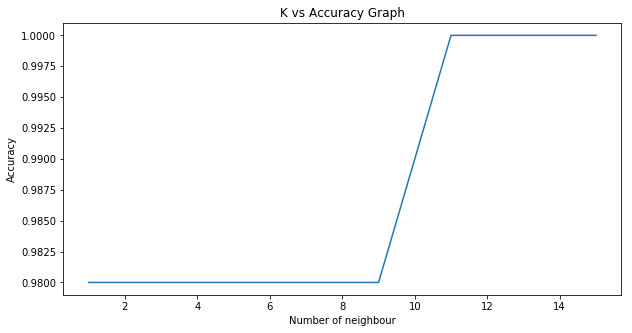

In [9]:
# ploting the Line Plot
plt.figure(figsize=(10,5))                  # set fig size
plt.plot(range(1, 16,2),acc)                # set plot 
plt.xlabel('Number of neighbour')           # set x label 
plt.ylabel('Accuracy')                      # set y label
plt.title('K vs Accuracy Graph')            # set title
plt.show()

# Thank You
**Shahariar Rabby**

***151-15-5424***